# **[실습] 관련성 여부를 평가하는 RAG 에이전트 만들기**

In [ ]:
!pip install -qU langchain_community langgraph langchain_openai langchain_upstage langchain_tavily langchain_experimental langchain_chroma pypdf

In [ ]:
import getpass
import os


def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")


_set_env("OPENAI_API_KEY")
_set_env("UPSTAGE_API_KEY")
_set_env("TAVILY_API_KEY")

OPENAI_API_KEY: ··········
UPSTAGE_API_KEY: ··········
TAVILY_API_KEY: ··········


## 🗄️ Vector DB (문서 검색을 위한 Retriever 생성하기)

[SPRi AI Brief 8월호 다운로드 받기](https://spri.kr/posts/view/23902?code=AI-Brief&s_year=&data_page=1)

In [ ]:
from langchain_community.document_loaders import PyPDFLoader
from langchain_experimental.text_splitter import SemanticChunker
from langchain_openai.embeddings import OpenAIEmbeddings
from langchain_upstage import UpstageEmbeddings

file_path = "SPRi AI Brief_8월호_산업동향_F.pdf"

loader = PyPDFLoader(file_path)
pages = []

for page in loader.lazy_load():
    pages.append(page)

embeddings = UpstageEmbeddings(model="solar-embedding-1-large")
# embeddings = OpenAIEmbeddings()
text_splitter = SemanticChunker(embeddings)

docs = text_splitter.split_documents(pages)

In [ ]:
for chunk in docs:
    print("[", chunk.metadata["page"], "]")
    print(chunk.page_content)
    print("="*100)

[ 0 ]
2025년
8월호
인공지능 산업의 최신 동향
[ 1 ]
SPRi AI Brief 2025 년 8월호
2
CONTENTS
정책･법제∙ 대만 디지털발전부 , 의회에서 AI 산업 발전 정책 현황 보고 2
∙OECD, 범용 기술로서 생성 AI의 생산성과 정책적 함의 분석 3
∙미국 상원, 예산안에서 주 정부의 AI 규제를 10년간 금지하는 조항 삭제 4
∙미국 트럼프 대통령 , 미국 AI 행동계획과 행정명령 발표 5
∙EU 집행위원회 , 「AI 법」의 범용 AI 관련 실천 강령과 지침 발표 6
기업･산업∙미드저니 , 첫 번째 비디오 생성 AI 모델 ‘V1’ 출시 8
∙바이두 , 10년 만에 AI 기반으로 검색 서비스 대폭 개편 9
∙ 문샷 AI, 에이전트 기능 지원하는 ‘키미 K2’ 오픈소스 공개 10
∙ xAI, 차세대 AI 모델 ‘그록 4’ 공개 및 정부 AI 시장 진출 11
∙퍼플렉시티 , AI 에이전트 탑재한 웹 브라우저 ‘코멧’ 출시 12
∙오픈AI, 사용자 대신 복잡한 작업을 처리하는 ‘챗GPT 에이전트 ’ 공개 13
기술･연구∙ 구글 딥마인드 , 인간 DNA 염기서열 분석 AI 모델 ‘알파게놈 ’ 공개 15
∙일본경제신문 조사 결과, AI용 비밀 지시 숨긴 논문 다수 발견 16
∙사카나 AI, 첨단 AI 모델 간 협력을 통한 추론 강화 알고리즘 개발 17
∙ 미국 프린스턴 ⼤ 연구 결과, 인간과 LLM 모두 AI 사용한 글을 낮게 평가 18
∙마이크로소프트 , AI 의료 진단 시스템 ‘MAI-DxO’ 공개 19
∙구글, 의료용 AI 모델 ‘메드젬마 ’ 오픈소스 공개 20
∙METR 연구 결과, AI 도구 사용 시 숙련 개발자의 작업 속도 둔화 21
인력･교육 ∙세일즈포스 조사 결과, 사무직 근로자의 일일 AI 사용 급증 23
∙ 앤스로픽 , AI로 인한 노동 문제 대응을 위한 ‘경제 미래 프로그램 ’ 출범 24
∙구글 딥마인드 , AI 코딩 기업 윈드서프의 핵심 인력 영입 25
주요행사일정26| 2025 년 8월호 |
[ 2 ]
| 2025 년

In [ ]:
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings
from langchain_upstage import UpstageEmbeddings

embeddings = UpstageEmbeddings(model="solar-embedding-1-large")
# embeddings = OpenAIEmbeddings()

vectorstore = Chroma.from_documents(documents=docs, embedding=embeddings)

In [ ]:
retriever = vectorstore.as_retriever(search_kwargs={"k": 1})

In [ ]:
question = "퍼플렉시티의 웹 브라우저 출시 소식"
retriever.invoke(question)

[Document(id='0b099939-492f-4503-b10b-72e19ef426bb', metadata={'author': 'dj', 'page': 13, 'moddate': '2025-08-06T10:46:01+09:00', 'creationdate': '2025-08-06T10:46:01+09:00', 'pdfversion': '1.4', 'total_pages': 29, 'source': 'SPRi AI Brief_8월호_산업동향_F.pdf', 'page_label': '14', 'creator': 'Hwp 2022 12.0.0.4204', 'producer': 'Hancom PDF 1.3.0.550'}, page_content='SPRi AI Brief 2025 년 8월호\n12퍼플렉시티 , AI 에이전트 탑재한 웹 브라우저 ‘코멧’ 출시\nn퍼플렉시티가 이메일과 캘린더 일정 요약, 브라우저 탭 관리, 웹 페이지 탐색 등 일상적인 작업을 \n자동화하는 AI 에이전트를 탑재한 AI 기반 웹 브라우저 ‘코멧’을 출시\nn퍼플렉시티는 코멧을 통해 구글 대신 자사 플랫폼으로 사용자를 직접 끌어들인다는 구상을 \n드러냈으나 , 테스트 결과 복잡한 작업에서는 완성도가 떨어진다는 평가KEY Contents\n£코멧, AI 에이전트를 통해 이메일과 캘린더 일정 요약 등 일상적 작업 자동화\nn퍼플렉시티 (Perplexity) 가 2025 년 7월 9일 자체 개발한 AI 기반 웹브라우저 ‘코멧(Comet)’ 을 출시\n∙코멧은 월 200달러의 맥스(Max) 요금제 가입자와 대기자 명단에 등록된 일부 고객에게 우선 제공되며 , \n추후 모든 사용자에게 무료로 제공 예정 \nn퍼플렉시티는 지난 30년간 인터넷이 단순한 탐색과 검색 환경에서 진화해 우리가 “생활하고 일하고 \n소통하는 곳”이라며 코멧은 오늘날의 인터넷 환경에 맞춰 개발된 웹 브라우저라고 강조\n∙퍼플렉시티는 인터넷의 진화에도 불구하고 인터넷 사용 도구는 여전히 원시적인 수준에 머물러 있다며 , \n인

In [ ]:
question = "구글의 의료용 AI 모델"
retriever.invoke(question)

[Document(id='004529f7-2beb-429e-8872-554766513ea7', metadata={'total_pages': 29, 'producer': 'Hancom PDF 1.3.0.550', 'creator': 'Hwp 2022 12.0.0.4204', 'creationdate': '2025-08-06T10:46:01+09:00', 'pdfversion': '1.4', 'author': 'dj', 'moddate': '2025-08-06T10:46:01+09:00', 'page_label': '22', 'source': 'SPRi AI Brief_8월호_산업동향_F.pdf', 'page': 21}, page_content='SPRi AI Brief 2025 년 8월호\n20구글, 의료용 AI 모델 ‘메드젬마 ’ 오픈소스 공개 \nn구글이 2025 년 5월 처음 공개한 의료용 AI 모델 ‘메드젬마 ’의 신규 멀티모달 버전과 의료 이미지  \n분류와 검색에 특화된 경량 이미지 인코더 ‘메드시그립 ’을 공개\nn메드젬마 27B 텍스트 모델은 의학 벤치마크인 MedQA 에서 87.7% 를 기록해 선두 오픈소스 \n모델인 딥시크 R1과 3%p의 근소한 차이를 나타냈으나 추론 비용은 약 10분의 1에 불과KEY Contents\n£의료 데이터로 훈련된 메드젬마 , 의학 벤치마크에서 최고 수준의 성능 달성\nn구글이 2025 년 7월 9일 의료 및 생명과학 분야 연구에 특화된 AI 모델 ‘메드젬마 (MedGemma)’ 와 \n‘메드시그립 (MedSigLIP)’ 을 깃허브에 오픈소스로 공개\n∙2025 년 5월 의료 텍스트와 이미지 분석에 특화된 메드젬마 4B 멀티모달과 27B 텍스트 전용 모델을 처음 \n발표했으며 , 복잡한 멀티모달과 전자의료기록 해석 기능을 추가한 ‘메드젬마 27B 멀티모달 ’ 모델을 새로 공개\n∙구글 연구진은 의학적으로 최적화된 이미지 인코더 (메드시그립 )를 학습시킨 후, 젬마 3 모델의 4B와 27B \n버전에 의료 데이터를 

## 👩‍💻 LangGraph로 RAG Agent 파이프라인 구성하기

### **State** - 그래프의 상태 (기억(추적)해야하는 값)

In [ ]:
from typing_extensions import TypedDict
from typing import Annotated
from langgraph.graph.message import add_messages

class State(TypedDict):
    """
    Represents the state of our graph.

    Attributes:
        question: question
        generation: LLM generation
        document: retrieved document
    """

    question: str # 사용자의 질문
    generation: str # LLM의 생성 답변
    document: str # 검색된 문서
    messages: Annotated[list, add_messages] # 메시지 히스토리 저장

### **Node & Edge** - 실제 작업을 수행하는 단위 및 연결

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_upstage import ChatUpstage

# llm = ChatOpenAI(model="gpt-4o", temperature=0)
llm = ChatUpstage(model="solar-pro-250422")

- 사용자의 입력이 내부 벡터 DB 검색이 필요한지, 웹 검색이 필요한지 판단하는 엣지

In [ ]:
from pydantic import BaseModel, Field

class QueryType(BaseModel):
    """Classify whether the user question requires a web search or a db search."""
    classification: str = Field(description="Answer 'web_search' or 'db_search' only.")

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from typing import Literal

def classify_question_type(state: State) -> Literal["web_search", "db_search"]:
    """
    Determines whether the user question requires a web search or should be answered using an internal document.
    """

    print("##### CLASSIFY QUESTION TYPE #####")

    grader_prompt = ChatPromptTemplate.from_template(
        """
        You are a classifier that decides how to answer a user question.

        User question: {question}

        If the question is about current events, places, festivals, entertainment, or general facts not found in the August 2025 AI Policy Report, classify it as "web_search".
        If the question is about AI policy, laws, technical trends, research papers, company announcements, education, or government strategies — topics likely covered in the August 2025 AI Policy Report — classify it as "db_search".

        Respond with one word only: "web_search" or "db_search".
        """
    )

    chain = grader_prompt | llm.with_structured_output(QueryType)

    question = state["question"]
    print("question:", question)

    result = chain.invoke({"question": question})
    decision = result.classification

    if decision == "web_search":
        print("---DECISION: USE WEB SEARCH---")
        return "web_search"
    else:
        print("---DECISION: USE INTERNAL DOC---")
        return "db_search"

- 1) 문서 검색(Retrieval)을 실행하는 노드

In [ ]:
def retrieve(state: State):
    """
    Retrieve documents
    """
    print("##### RETRIEVE #####")
    question = state["question"]

    document = retriever.invoke(question)

    return {"document": document[0].page_content, "question": question, "messages" : [document[0].page_content]}

- 2) 웹 검색을 하는 에이전트 노드

In [ ]:
from langchain_tavily import TavilySearch
from langgraph.prebuilt import create_react_agent

web_search_agent = create_react_agent(llm, tools=[TavilySearch(max_results=3)])

- 검색된 문서의 관련성을 평가하는 엣지

In [ ]:
from pydantic import BaseModel, Field

class grade(BaseModel):
    """Binary score for relevance check."""

    binary_score: str = Field(description="Relevance score 'yes' or 'no'")

In [ ]:
from langchain import hub
from langchain_core.prompts import ChatPromptTemplate

from langgraph.prebuilt import tools_condition
from langgraph.types import Command, interrupt

from typing import Annotated, Literal, Sequence

def grade_documents(state: State) -> Literal["generate", "transform_query"]:
    """
    Determines whether the retrieved documents are relevant to the question.
    """

    print("##### CHECK RELEVANCE #####")

    grader_prompt = ChatPromptTemplate.from_template(
        """
        You are a grader assessing relevance of a retrieved document to a user question. \n
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the user question is too short, vague, or lacks enough context to clearly determine intent, grade it as not relevant and RETURN "no" \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.
        """
    )

    grade_chain = grader_prompt | llm.with_structured_output(grade)

    question = state["question"]
    docs = state["document"]

    print("question", question)
    print("context", docs)

    scored_result = grade_chain.invoke({"question": question, "context": docs})

    score = scored_result.binary_score # yes or no

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generate"

    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        print(score)
        return "transform_query"

- 쿼리를 다시 작성하는 노드

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.messages import HumanMessage

def transform_query(state):
    """
    Transform the query to produce a better question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates question key with a re-phrased question
    """

    print("##### TRANSFORM QUERY #####")
    question = state["question"]

    re_write_prompt = ChatPromptTemplate.from_template(
        """
        "You a question re-writer that converts an input question to a better version that is optimized \n
        for vectorstore retrieval. Look at the input and try to reason about the underlying semantic intent / meaning.\n\n

        Here is the initial question: \n\n {question} \n Formulate an improved question In Korean.
        """
    )

    question_rewriter = re_write_prompt | llm

    better_question = question_rewriter.invoke({"question": question})
    print("question", question)
    print("better_question", better_question.content)
    return {"question": better_question.content, "messages" : [better_question]}


- 답변 생성을 하는 노드

In [ ]:
from langchain import hub

def generate(state: State):
    """
    Generate answer based on the retrieved document and the question.
    """
    print("##### GENERATE #####")
    question = state["question"]
    document = state["document"]
    print("question", question)
    print("context", document)
    prompt = hub.pull("rlm/rag-prompt")

    response = llm.invoke(
        prompt.format_messages(context=document, question=question)
    )
    print("response", response)
    return {"document": document, "question": question, "generation": response.content, "messages": [response]}

In [ ]:
from langchain import hub
hub.pull("rlm/rag-prompt").pretty_print()

================================ Human Message =================================

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: {question} 
Context: {context} 
Answer:


/usr/local/lib/python3.11/dist-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


### 그래프 생성!

In [ ]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode, tools_condition

graph_builder = StateGraph(State)

graph_builder.add_node("retrieve", retrieve)
graph_builder.add_node("web_search_agent", web_search_agent)

graph_builder.add_conditional_edges(
    START,
    classify_question_type,
    {
        "db_search": "retrieve",
        "web_search": "web_search_agent",
    },
)

graph_builder.add_edge("web_search_agent", END)

In [ ]:
graph_builder.add_node("generate", generate)
graph_builder.add_node("transform_query", transform_query)

graph_builder.add_conditional_edges(
    "retrieve",
    grade_documents,
)
graph_builder.add_edge("transform_query", "retrieve")
graph_builder.add_edge("generate", END)

graph = graph_builder.compile()

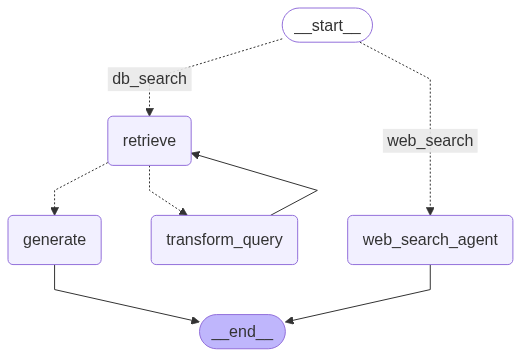

In [ ]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

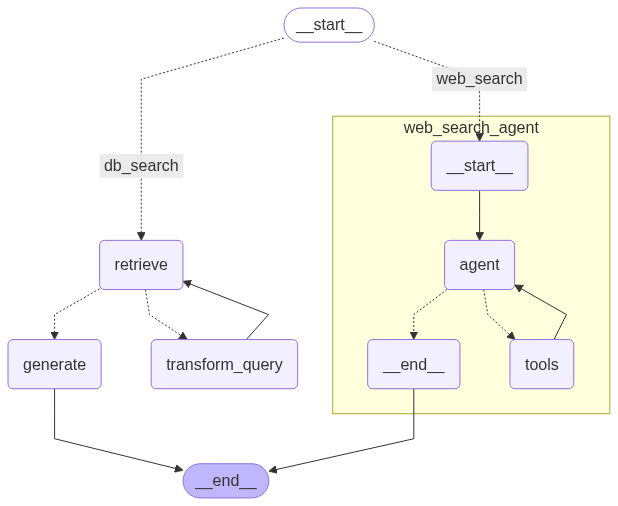

In [ ]:
try:
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    pass

### 테스트

In [ ]:
from langgraph.errors import GraphRecursionError

inputs = {
    "question": "2025년 여름 한강 축제에 대해 알려주세요.", "messages": "2025년 여름 한강 축제에 대해 알려주세요."
}
try:
    response = graph.invoke(inputs)
except GraphRecursionError as e:
        print("Recursion Error")

##### CLASSIFY QUESTION TYPE #####
question: 2025년 여름 한강 축제에 대해 알려주세요.
---DECISION: USE WEB SEARCH---


In [ ]:
for msg in response["messages"]:
    msg.pretty_print()

================================ Human Message =================================

2025년 여름 한강 축제에 대해 알려주세요.
================================== Ai Message ==================================
Tool Calls:
  tavily_search (3c207dc0-b331-402b-b4e7-44378db09698)
 Call ID: 3c207dc0-b331-402b-b4e7-44378db09698
  Args:
    query: 2025 summer Han River festival
    search_depth: advanced
    time_range: year
================================= Tool Message =================================
Name: tavily_search

{"query": "2025 summer Han River festival", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://korea.stripes.com/travel/2025-festival-schedule-across-all-seasons-in-seoul,-korea.html", "title": "2025 festival schedule across all seasons in Seoul, Korea", "content": "The summer season features classical and contemporary performances, including the Seoul Philharmonic Riverside Concert (June 13–14) at Yeouido Hangang Park and the Seoul Summer Arts Festival (J

In [ ]:
inputs = {
    "question": "구글이 공개한 의료 AI 모델에 대해 문서에서 찾아 알려주세요.", "messages": "구글이 공개한 의료 AI 모델에 대해 문서에서 찾아 알려주세요."
}
try:
    response = graph.invoke(inputs)
except GraphRecursionError as e:
        print("Recursion Error")

##### CLASSIFY QUESTION TYPE #####
question: 구글이 공개한 의료 AI 모델에 대해 문서에서 찾아 알려주세요.
---DECISION: USE INTERNAL DOC---
##### RETRIEVE #####
##### CHECK RELEVANCE #####
question 구글이 공개한 의료 AI 모델에 대해 문서에서 찾아 알려주세요.
context SPRi AI Brief 2025 년 8월호
20구글, 의료용 AI 모델 ‘메드젬마 ’ 오픈소스 공개 
n구글이 2025 년 5월 처음 공개한 의료용 AI 모델 ‘메드젬마 ’의 신규 멀티모달 버전과 의료 이미지  
분류와 검색에 특화된 경량 이미지 인코더 ‘메드시그립 ’을 공개
n메드젬마 27B 텍스트 모델은 의학 벤치마크인 MedQA 에서 87.7% 를 기록해 선두 오픈소스 
모델인 딥시크 R1과 3%p의 근소한 차이를 나타냈으나 추론 비용은 약 10분의 1에 불과KEY Contents
£의료 데이터로 훈련된 메드젬마 , 의학 벤치마크에서 최고 수준의 성능 달성
n구글이 2025 년 7월 9일 의료 및 생명과학 분야 연구에 특화된 AI 모델 ‘메드젬마 (MedGemma)’ 와 
‘메드시그립 (MedSigLIP)’ 을 깃허브에 오픈소스로 공개
∙2025 년 5월 의료 텍스트와 이미지 분석에 특화된 메드젬마 4B 멀티모달과 27B 텍스트 전용 모델을 처음 
발표했으며 , 복잡한 멀티모달과 전자의료기록 해석 기능을 추가한 ‘메드젬마 27B 멀티모달 ’ 모델을 새로 공개
∙구글 연구진은 의학적으로 최적화된 이미지 인코더 (메드시그립 )를 학습시킨 후, 젬마 3 모델의 4B와 27B 
버전에 의료 데이터를 학습시켜 보고서 작성 등 의료 텍스트와 영상 작업에 유용한 메드젬마를 개발 
∙메드시그립은 흉부 X선, 피부과 이미지 등 다양한 의료 영상 데이터를 활용해 텍스트와 이미지의 사전학습 
아키텍처 (SigLIP*) 를 개선한 이미지 인코더 모델로 , 기존 이미지나 새로운 이미지의 분류, 시

/usr/local/lib/python3.11/dist-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


response content="구글은 2025년 5월 처음 공개한 의료용 AI 모델 '메드젬마'의 신규 멀티모달 버전과 의료 이미지 분류와 검색에 특화된 경량 이미지 인코더 '메드시그립'을 공개했습니다. 메드젬마 27B 텍스트 모델은 의학 벤치마크인 MedQA에서 87.7%를 기록해 선두 오픈소스 모델인 딥시크 R1과 3%p의 근소한 차이를 나타냈으나 추론 비용은 약 10분의 1에 불과합니다." additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 125, 'prompt_tokens': 793, 'total_tokens': 918, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'solar-pro-250422', 'system_fingerprint': None, 'id': '231d29ab-4e5a-4300-97c9-1a9fe95d48e6', 'service_tier': None, 'finish_reason': 'stop', 'logprobs': None} id='run--197c0958-e98c-4001-8ec7-558844de0e7c-0' usage_metadata={'input_tokens': 793, 'output_tokens': 125, 'total_tokens': 918, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [ ]:
for msg in response["messages"]:
    msg.pretty_print()

================================ Human Message =================================

구글이 공개한 의료 AI 모델에 대해 문서에서 찾아 알려주세요.
================================ Human Message =================================

SPRi AI Brief 2025 년 8월호
20구글, 의료용 AI 모델 ‘메드젬마 ’ 오픈소스 공개 
n구글이 2025 년 5월 처음 공개한 의료용 AI 모델 ‘메드젬마 ’의 신규 멀티모달 버전과 의료 이미지  
분류와 검색에 특화된 경량 이미지 인코더 ‘메드시그립 ’을 공개
n메드젬마 27B 텍스트 모델은 의학 벤치마크인 MedQA 에서 87.7% 를 기록해 선두 오픈소스 
모델인 딥시크 R1과 3%p의 근소한 차이를 나타냈으나 추론 비용은 약 10분의 1에 불과KEY Contents
£의료 데이터로 훈련된 메드젬마 , 의학 벤치마크에서 최고 수준의 성능 달성
n구글이 2025 년 7월 9일 의료 및 생명과학 분야 연구에 특화된 AI 모델 ‘메드젬마 (MedGemma)’ 와 
‘메드시그립 (MedSigLIP)’ 을 깃허브에 오픈소스로 공개
∙2025 년 5월 의료 텍스트와 이미지 분석에 특화된 메드젬마 4B 멀티모달과 27B 텍스트 전용 모델을 처음 
발표했으며 , 복잡한 멀티모달과 전자의료기록 해석 기능을 추가한 ‘메드젬마 27B 멀티모달 ’ 모델을 새로 공개
∙구글 연구진은 의학적으로 최적화된 이미지 인코더 (메드시그립 )를 학습시킨 후, 젬마 3 모델의 4B와 27B 
버전에 의료 데이터를 학습시켜 보고서 작성 등 의료 텍스트와 영상 작업에 유용한 메드젬마를 개발 
∙메드시그립은 흉부 X선, 피부과 이미지 등 다양한 의료 영상 데이터를 활용해 텍스트와 이미지의 사전학습 
아키텍처 (SigLIP*) 를 개선한 이미지 인코더 모델로 , 기존 이미지나 새로운 이미지의 분류, 시각적으로나 
의미적으로 유사한

In [ ]:
inputs = {
    "question": "AI 트렌드 문서에서 퍼플렉시티는 ...?", "messages": "AI 트렌드 문서에서 퍼플렉시티는 ...?"
}
try:
    response = graph.invoke(inputs)
except GraphRecursionError as e:
        print("Recursion Error")

##### CLASSIFY QUESTION TYPE #####
question: AI 트렌드 문서에서 퍼플렉시티는 ...?
---DECISION: USE INTERNAL DOC---
##### RETRIEVE #####
##### CHECK RELEVANCE #####
question AI 트렌드 문서에서 퍼플렉시티는 ...?
context SPRi AI Brief 2025 년 8월호
12퍼플렉시티 , AI 에이전트 탑재한 웹 브라우저 ‘코멧’ 출시
n퍼플렉시티가 이메일과 캘린더 일정 요약, 브라우저 탭 관리, 웹 페이지 탐색 등 일상적인 작업을 
자동화하는 AI 에이전트를 탑재한 AI 기반 웹 브라우저 ‘코멧’을 출시
n퍼플렉시티는 코멧을 통해 구글 대신 자사 플랫폼으로 사용자를 직접 끌어들인다는 구상을 
드러냈으나 , 테스트 결과 복잡한 작업에서는 완성도가 떨어진다는 평가KEY Contents
£코멧, AI 에이전트를 통해 이메일과 캘린더 일정 요약 등 일상적 작업 자동화
n퍼플렉시티 (Perplexity) 가 2025 년 7월 9일 자체 개발한 AI 기반 웹브라우저 ‘코멧(Comet)’ 을 출시
∙코멧은 월 200달러의 맥스(Max) 요금제 가입자와 대기자 명단에 등록된 일부 고객에게 우선 제공되며 , 
추후 모든 사용자에게 무료로 제공 예정 
n퍼플렉시티는 지난 30년간 인터넷이 단순한 탐색과 검색 환경에서 진화해 우리가 “생활하고 일하고 
소통하는 곳”이라며 코멧은 오늘날의 인터넷 환경에 맞춰 개발된 웹 브라우저라고 강조
∙퍼플렉시티는 인터넷의 진화에도 불구하고 인터넷 사용 도구는 여전히 원시적인 수준에 머물러 있다며 , 
인간의 사고처럼 유연하고 반응성이 뛰어난 웹 인터페이스로 코멧을 설계했다고 설명
∙퍼플렉시티에 따르면 코멧은 웹브라우징 경험을 단일하고 원활한 상호작용으로 전환하고 복잡한 작업 
흐름을 유기적 대화로 압축하여 정보 검색을 넘어 실제 작업까지 수행
∙코멧에는 퍼플렉시티의 AI 검색엔진이 내장되어 검색 결과에 대한 AI 생성 요약을 보

/usr/local/lib/python3.11/dist-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


response content="퍼플렉시티는 AI 에이전트를 탑재한 AI 기반 웹 브라우저 '코멧'을 출시했습니다. 코멧은 이메일과 캘린더 일정 요약, 브라우저 탭 관리, 웹 페이지 탐색 등 일상적인 작업을 자동화하는 AI 에이전트인 코멧 어시스턴트를 탑재하고 있습니다." additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 68, 'prompt_tokens': 851, 'total_tokens': 919, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'solar-pro-250422', 'system_fingerprint': None, 'id': '5791601d-f9fa-4d1d-9be3-b1fecbae803c', 'service_tier': None, 'finish_reason': 'stop', 'logprobs': None} id='run--c12ed8b9-0d76-4f83-a995-806bfe1d0070-0' usage_metadata={'input_tokens': 851, 'output_tokens': 68, 'total_tokens': 919, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [ ]:
for msg in response["messages"]:
    msg.pretty_print()

================================ Human Message =================================

AI 트렌드 문서에서 퍼플렉시티는 ...?
================================ Human Message =================================

SPRi AI Brief 2025 년 8월호
12퍼플렉시티 , AI 에이전트 탑재한 웹 브라우저 ‘코멧’ 출시
n퍼플렉시티가 이메일과 캘린더 일정 요약, 브라우저 탭 관리, 웹 페이지 탐색 등 일상적인 작업을 
자동화하는 AI 에이전트를 탑재한 AI 기반 웹 브라우저 ‘코멧’을 출시
n퍼플렉시티는 코멧을 통해 구글 대신 자사 플랫폼으로 사용자를 직접 끌어들인다는 구상을 
드러냈으나 , 테스트 결과 복잡한 작업에서는 완성도가 떨어진다는 평가KEY Contents
£코멧, AI 에이전트를 통해 이메일과 캘린더 일정 요약 등 일상적 작업 자동화
n퍼플렉시티 (Perplexity) 가 2025 년 7월 9일 자체 개발한 AI 기반 웹브라우저 ‘코멧(Comet)’ 을 출시
∙코멧은 월 200달러의 맥스(Max) 요금제 가입자와 대기자 명단에 등록된 일부 고객에게 우선 제공되며 , 
추후 모든 사용자에게 무료로 제공 예정 
n퍼플렉시티는 지난 30년간 인터넷이 단순한 탐색과 검색 환경에서 진화해 우리가 “생활하고 일하고 
소통하는 곳”이라며 코멧은 오늘날의 인터넷 환경에 맞춰 개발된 웹 브라우저라고 강조
∙퍼플렉시티는 인터넷의 진화에도 불구하고 인터넷 사용 도구는 여전히 원시적인 수준에 머물러 있다며 , 
인간의 사고처럼 유연하고 반응성이 뛰어난 웹 인터페이스로 코멧을 설계했다고 설명
∙퍼플렉시티에 따르면 코멧은 웹브라우징 경험을 단일하고 원활한 상호작용으로 전환하고 복잡한 작업 
흐름을 유기적 대화로 압축하여 정보 검색을 넘어 실제 작업까지 수행
∙코멧에는 퍼플렉시티의 AI 검색엔진이 내장되어 검색 결과에 대한 AI 생성 요약을 보여주며 